In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
## load and preprocess data

In [4]:
from keras.datasets import imdb
from keras.preprocessing import sequence

In [5]:
max_features = 10000
maxlen = 500
batch_size = 32

In [7]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=maxlen)

In [9]:
print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')

25000 train sequences
25000 test sequences


In [10]:
print('Pad sequences (samples x time)')

Pad sequences (samples x time)


In [11]:
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)

In [12]:
print('input_train shape:', X_train.shape)
print('input_test shape:', X_test.shape)

input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [13]:
from keras import Sequential
from keras.layers import Dense, Embedding, SimpleRNN


model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])


In [15]:
history = model.fit(X_train, y_train,
epochs=10,
batch_size=128,
validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 23s 1ms/step - loss: 0.6758 - acc: 0.5607 - val_loss: 0.5561 - val_acc: 0.7380
Epoch 2/10
20000/20000 [==============================] - 23s 1ms/step - loss: 0.5295 - acc: 0.7479 - val_loss: 0.5178 - val_acc: 0.7540
Epoch 3/10
20000/20000 [==============================] - 23s 1ms/step - loss: 0.4756 - acc: 0.7823 - val_loss: 0.4679 - val_acc: 0.7832
Epoch 4/10
20000/20000 [==============================] - 23s 1ms/step - loss: 0.4484 - acc: 0.7961 - val_loss: 0.4632 - val_acc: 0.7850
Epoch 5/10
20000/20000 [==============================] - 23s 1ms/step - loss: 0.4385 - acc: 0.8010 - val_loss: 0.5541 - val_acc: 0.7360
Epoch 6/10
20000/20000 [==============================] - 23s 1ms/step - loss: 0.4255 - acc: 0.8103 - val_loss: 0.5315 - val_acc: 0.7276
Epoch 7/10
20000/20000 [==============================] - 23s 1ms/step - loss: 0.4255 - acc: 0.8122 - val_loss: 0.4624 - val_acc:

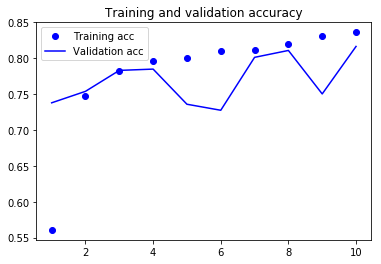

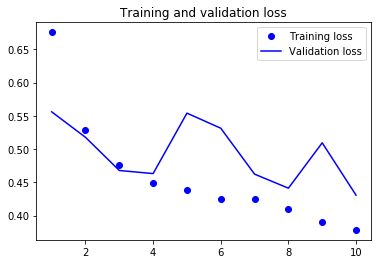

In [16]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')

plt.title('Training and validation accuracy')
plt.legend()


plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()


plt.show()